In [85]:
import numpy as np
import pandas as pd

X = [[1500,158900],[1700,169850],[1750,178950],[1800,178650],[1820,180000],[1920,186850],[1450,150000],
[1590,149870],[1596,158620],[1623,159990],[1878,189680],[1658,168980],[1720,170000],[1985,190000],[2000,198510],[2100,200000],
[2050,193580],[1990,200000],[1965,195180],[1970,198680],[2120,201650],[2200,220000],
[2156,216510],[1269,138550],[1489,149850],[1785,179850],[1965,196280],[1948,195680],
[2008,200000],[2079,205880],[2116,210000],[2230,220000],[2200,219850],[2220,222000],[2365,235680],[2325,239580],
[2396,240000],[2489,248850],[2420,245590],[2398,240000],[2350,236840],[2375,230000],[2236,226260],[2347,220590],[2459,239840]]
df = pd.DataFrame(X,columns=['House area sq ft','Price'])
print(df.head(3))



   House area sq ft   Price
0              1500  158900
1              1700  169850
2              1750  178950


In [86]:
from sklearn.model_selection import train_test_split
y = np.array(df['Price'])
y= y.reshape((y.shape[0],1))
x = np.array(df.drop('Price',axis=1))
X = x
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)

(36, 1) (36, 1)


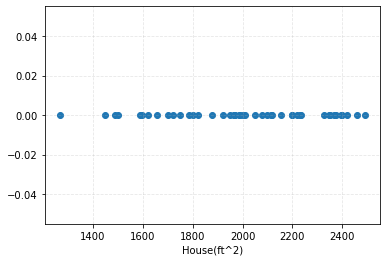

In [87]:
import matplotlib.pyplot as plt
samples = X.shape[0]
zero_axis = np.zeros(samples)
fg, ax = plt.subplots(1,1)

ax.scatter(X,zero_axis)
ax.grid(linestyle='--', alpha=0.3)
plt.xlabel('House(ft^2)')
plt.show()

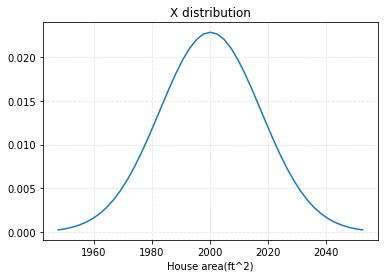

In [88]:
import scipy.stats as stats
import math
mean = np.mean(X)
variance = np.std(X)
std = math.sqrt(variance) # standard deviation formula
samples=X.shape[0]
# generating samples of X up to 3 std
data = np.linspace(mean - 3*std, mean + 3*std, samples) 
fg, ax = plt.subplots(1,1)
pdf = stats.norm.pdf(data, mean, std)
ax.plot(data, pdf)
# ax.hist(stats.norm.pdf(data, mean, std))
ax.grid(linestyle='--', alpha=0.3)
plt.xlabel('House area(ft^2)')
plt.title("X distribution")
plt.show()

# MLE theory

$$
\Large P(Y| X ; \theta) 
$$

$$
\Large P(Y| X ; \theta) = \prod_{i=1}^{n}P(y_i| x_i ; \theta)
$$

<!-- $$
\Large f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(Y-\mu)^2}{2\sigma^2}}
$$ -->

$$\Large \theta_{MLE} = argmax\prod_{i=1}^{n}P(y_i|x_i\theta, \sigma^2)$$

$$\Large \theta_{MLE} = argmax\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-x_i\theta)^2}{2\sigma^2}}$$

<!-- $$
\Large P(Y|X\theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(Y-x_i\theta)^2}{2\sigma^2}}
$$ -->

$$\Large \theta_{MLE} = argmin\sum_{i=1}^{n}-\log(P(y_i|x_i; \theta, \sigma^2))$$

$$\Large \theta_{MLE} = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(y_i-x_i\theta)^2}{2\sigma^2}}\right)$$

$$\Large \theta_{MLE} = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{(y_i-x_i\theta)^2}{2\sigma^2}$$

$$\Large J(\theta_{MLE}) = - \sum_{i=1}^n - \log\left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)-\frac{(y_i-x_i\theta)^2}{2\sigma^2}$$


$$\Large \Delta J(\theta_{MLE}) = - 2*\sum_{i=1}^n -\frac{(y_i-x_i\theta)^2}{2\sigma^2}*x_i*\frac{1}{2\sigma^2}$$


$$\Large \Delta J(\theta_{MLE}) = - 2n*\frac{1}{2\sigma^2 * 2\sigma^2}*\sum_{i=1}^n -\frac{(y_i-x_i\theta)^2}{1}*x_i$$


In [89]:
df.head()

,House area sq ft,Price
0,1500,158900
1,1700,169850
2,1750,178950
3,1800,178650
4,1820,180000


In [90]:
df_model = df.copy()
df_model['c'] = 1

In [91]:
# np.random.seed(10)
theta = [np.random.rand(), np.random.rand()]

In [8]:
theta

[0.3944178917455159, 0.9586140073969834]

In [9]:
x_temp = np.array([[2, 1], [3, 1]])
t_temp = np.array([2, 3])
np.matmul(x_temp, t_temp.T)

array([7, 9])

In [78]:
# X = np.array(X)
# t_temp = np.array([2, 3])
# print(X)
# np.matmul(X, t_temp.T)

In [93]:
df_model.head()

,House area sq ft,Price,c
0,1500,158900,1
1,1700,169850,1
2,1750,178950,1
3,1800,178650,1
4,1820,180000,1


In [100]:
X = df_model[['House area sq ft', 'c']].values
Y = df_model['Price'].values
t_temp = np.array([2, 3])
X.shape, Y.shape, t_temp.shape

((45, 2), (45,), (2,))

In [101]:
X.shape, t_temp.shape

((45, 2), (2,))

In [102]:
Y

array([158900, 169850, 178950, 178650, 180000, 186850, 150000, 149870,
       158620, 159990, 189680, 168980, 170000, 190000, 198510, 200000,
       193580, 200000, 195180, 198680, 201650, 220000, 216510, 138550,
       149850, 179850, 196280, 195680, 200000, 205880, 210000, 220000,
       219850, 222000, 235680, 239580, 240000, 248850, 245590, 240000,
       236840, 230000, 226260, 220590, 239840])

In [103]:
np.matmul(X, t_temp.T)

array([3003, 3403, 3503, 3603, 3643, 3843, 2903, 3183, 3195, 3249, 3759,
       3319, 3443, 3973, 4003, 4203, 4103, 3983, 3933, 3943, 4243, 4403,
       4315, 2541, 2981, 3573, 3933, 3899, 4019, 4161, 4235, 4463, 4403,
       4443, 4733, 4653, 4795, 4981, 4843, 4799, 4703, 4753, 4475, 4697,
       4921])

In [104]:
Y - np.matmul(X, t_temp.T)

array([155897, 166447, 175447, 175047, 176357, 183007, 147097, 146687,
       155425, 156741, 185921, 165661, 166557, 186027, 194507, 195797,
       189477, 196017, 191247, 194737, 197407, 215597, 212195, 136009,
       146869, 176277, 192347, 191781, 195981, 201719, 205765, 215537,
       215447, 217557, 230947, 234927, 235205, 243869, 240747, 235201,
       232137, 225247, 221785, 215893, 234919])

In [105]:
df_model.head()

,House area sq ft,Price,c
0,1500,158900,1
1,1700,169850,1
2,1750,178950,1
3,1800,178650,1
4,1820,180000,1


In [106]:
df_model_std = df_model.copy()
for c in df_model_std.columns:
    if c == 'c':
        continue
    mu, sig = np.mean(df_model_std[c]), np.std(df_model_std[c])
    print(c, mu, sig)
    df_model_std[c] = (df_model_std[c] - mu) / sig

House area sq ft 2000.2222222222222 305.045562271816
Price 199013.77777777778 29352.07395957558


In [107]:
df_model_std.head()

,House area sq ft,Price,c
0,-1.639828,-1.366642,1
1,-0.984188,-0.993585,1
2,-0.820278,-0.683556,1
3,-0.656368,-0.693776,1
4,-0.590804,-0.647783,1


In [108]:

X = df_model_std[['House area sq ft', 'c']].values
Y = df_model_std['Price'].values
print(X, Y)



[[-1.63982789e+00  1.00000000e+00]
 [-9.84188132e-01  1.00000000e+00]
 [-8.20278192e-01  1.00000000e+00]
 [-6.56368251e-01  1.00000000e+00]
 [-5.90804275e-01  1.00000000e+00]
 [-2.62984394e-01  1.00000000e+00]
 [-1.80373784e+00  1.00000000e+00]
 [-1.34479000e+00  1.00000000e+00]
 [-1.32512081e+00  1.00000000e+00]
 [-1.23660944e+00  1.00000000e+00]
 [-4.00668744e-01  1.00000000e+00]
 [-1.12187248e+00  1.00000000e+00]
 [-9.18624156e-01  1.00000000e+00]
 [-4.99014708e-02  1.00000000e+00]
 [-7.28488625e-04  1.00000000e+00]
 [ 3.27091393e-01  1.00000000e+00]
 [ 1.63181452e-01  1.00000000e+00]
 [-3.35104768e-02  1.00000000e+00]
 [-1.15465447e-01  1.00000000e+00]
 [-9.90744530e-02  1.00000000e+00]
 [ 3.92655369e-01  1.00000000e+00]
 [ 6.54911274e-01  1.00000000e+00]
 [ 5.10670526e-01  1.00000000e+00]
 [-2.39709182e+00  1.00000000e+00]
 [-1.67588808e+00  1.00000000e+00]
 [-7.05541233e-01  1.00000000e+00]
 [-1.15465447e-01  1.00000000e+00]
 [-1.71194827e-01  1.00000000e+00]
 [ 2.54971019e-02  1

In [109]:
# X = df_model[['House area sq ft', 'c']].values
# Y = df_model['Price'].values
# print(X, Y)


In [113]:
learning_rate = 0.1
iters = 2000
# np.random.seed(10)
# x = [np.random.rand() for _ in range(10)]
# t_temp = np.array([np.random.rand(), np.random.rand()])
t_temp = np.array([1, 2])
delta_t = np.array([0, 0])
n = len(Y)
err_prev = -np.inf
result = None
iter_rows = []
for it in range(iters):
    err = Y - np.matmul(X, t_temp.T)
#     delta_t =  err * 2/ n 
    delta_t =  -2/n * np.matmul(X.T, err)
    if it>= 10 and it % 10 == 0:
        print(it, np.round(np.sum(err), 4), t_temp, delta_t, X.shape, delta_t.shape)
    t_temp = t_temp - learning_rate* delta_t.T
    iter_row = {
        'ix': it,
        'err': np.round(np.sum(err), 4),
        't_temp': t_temp,
        'delta_t': delta_t
        
    }
    iter_rows.append(iter_row)
    if np.abs(err_prev - np.sum(err)) < 0.000001:
        result = t_temp
        print(f'Converged: {t_temp}')
        break
    err_prev = np.sum(err)
df_iter = pd.DataFrame(iter_rows)    

10 -9.6637 [0.98787797 0.21474836] [0.00291632 0.42949673] (45, 2) (2,)
20 -1.0376 [0.98657638 0.02305843] [0.00031314 0.04611686] (45, 2) (2,)
30 -0.1114 [0.98643662 0.00247588] [3.36229139e-05 4.95176016e-03] (45, 2) (2,)
40 -0.012 [9.86421618e-01 2.65845599e-04] [3.61023289e-06 5.31691198e-04] (45, 2) (2,)
50 -0.0013 [9.86420007e-01 2.85449539e-05] [3.87645805e-07 5.70899077e-05] (45, 2) (2,)
60 -0.0001 [9.86419834e-01 3.06499108e-06] [4.16231516e-08 6.12998216e-06] (45, 2) (2,)
70 -0.0 [9.86419815e-01 3.29100911e-07] [4.46925184e-09 6.58201823e-07] (45, 2) (2,)
Converged: [9.86419814e-01 6.90174632e-08]


In [114]:
df_iter.head()

,ix,err,t_temp,delta_t
0,0,-90.000,"[0.9972839626415493, 1.6]","[0.027160373584507527, 4.0]"
1,1,-72.000,"[0.9951111327547887, 1.28]","[0.021728298867605883, 3.2]"
2,2,-57.600,"[0.9933728688453802, 1.024]","[0.017382639094084745, 2.5600000000000005]"
3,3,-46.080,"[0.9919822577178534, 0.8191999999999999]","[0.013906111275267734, 2.0480000000000005]"
4,4,-36.864,"[0.990869768815832, 0.6553599999999999]","[0.011124889020214109, 1.6384000000000003]"


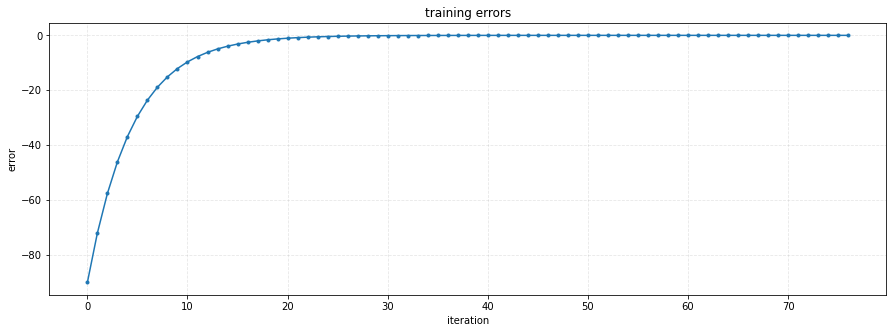

In [115]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [116]:
y_hat = np.matmul(X, result.T)

In [117]:
y_hat

array([-1.61755866e+00, -9.70822605e-01, -8.09138592e-01, -6.47454579e-01,
       -5.82780974e-01, -2.59412948e-01, -1.77924267e+00, -1.32652743e+00,
       -1.30712535e+00, -1.21981599e+00, -3.95227519e-01, -1.10663718e+00,
       -9.06149000e-01, -4.92237305e-02, -7.18526596e-04,  3.22649500e-01,
        1.60965486e-01, -3.30553292e-02, -1.13897336e-01, -9.77289345e-02,
        3.87323105e-01,  6.46017526e-01,  5.03735594e-01, -2.36453880e+00,
       -1.65312914e+00, -6.95959783e-01, -1.13897336e-01, -1.68869900e-01,
        2.51509155e-02,  2.54742214e-01,  3.74388384e-01,  7.43027934e-01,
        6.46017526e-01,  7.10691131e-01,  1.17957477e+00,  1.05022756e+00,
        1.27981886e+00,  1.58055112e+00,  1.35742718e+00,  1.28628622e+00,
        1.13106957e+00,  1.21191157e+00,  7.62430015e-01,  1.12136852e+00,
        1.48354071e+00])

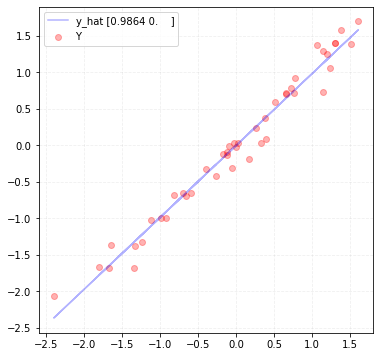

In [118]:
fg, ax = plt.subplots(1,1)
# ax.scatter(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label='$\hat{y}$')
ax.plot(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label=f'y_hat {np.round(result,4)}')
ax.scatter(df_model_std['House area sq ft'], Y, color='red', alpha=0.3, label='Y')
ax.grid(linestyle='--', alpha=0.2)
ax.legend()
fg.set_size_inches(6, 6)

In [119]:
!ls

50_Startups.csv                     MLE_notebook.ipynb
Date-Wise-Prices-all-Commodity.xlsx Salary_Data.csv
MLE.htm                             Untitled.ipynb
MLE_files


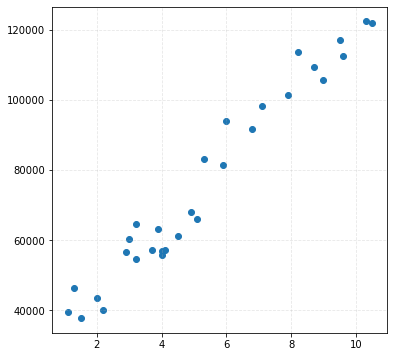

In [121]:
df2 = pd.read_csv('Salary_Data.csv')
df_model2 = df2.copy()
fg, ax = plt.subplots(1,1)
_ = ax.scatter(df2['YearsExperience'], df2['Salary'])
ax.grid(linestyle='--', alpha=0.3)
# ax.legend()
fg.set_size_inches(6, 6)

In [122]:
def standardize(df):
    df_tmp = df.copy()
    for c in df_tmp.columns:
        
        mu, sig = np.mean(df_tmp[c]), np.std(df_tmp[c])
        if sig == 0:
            continue
        #         print(c, mu, sig)
        df_tmp[c] = (df_tmp[c] - mu) / sig        
    return df_tmp

In [123]:
df2['c'] = 1
df2_std = standardize(df2)

In [124]:
df2_std.head()

,YearsExperience,Salary,c
0,-1.510053,-1.360113,1
1,-1.438373,-1.105527,1
2,-1.366693,-1.419919,1
3,-1.187494,-1.204957,1
4,-1.115814,-1.339781,1


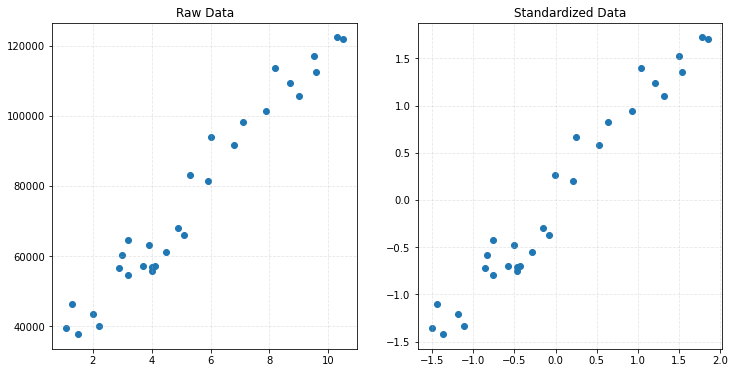

In [125]:
fg, ax = plt.subplots(1,2)
_ = ax[0].scatter(df2['YearsExperience'], df2['Salary'])
_ = ax[0].set_title('Raw Data')
_ = ax[1].scatter(df2_std['YearsExperience'], df2_std['Salary'])
_ = ax[1].set_title('Standardized Data')
for a in ax:
    a.grid(linestyle='--', alpha=0.3)
# ax.legend()
fg.set_size_inches(12, 6)

In [126]:

X = df2_std[['YearsExperience', 'c']].values
Y = df2_std['Salary'].values
print(X, Y)



[[-1.51005294  1.        ]
 [-1.43837321  1.        ]
 [-1.36669348  1.        ]
 [-1.18749416  1.        ]
 [-1.11581443  1.        ]
 [-0.86493538  1.        ]
 [-0.82909552  1.        ]
 [-0.75741579  1.        ]
 [-0.75741579  1.        ]
 [-0.57821647  1.        ]
 [-0.50653674  1.        ]
 [-0.47069688  1.        ]
 [-0.47069688  1.        ]
 [-0.43485702  1.        ]
 [-0.29149756  1.        ]
 [-0.1481381   1.        ]
 [-0.07645838  1.        ]
 [-0.00477865  1.        ]
 [ 0.21026054  1.        ]
 [ 0.2461004   1.        ]
 [ 0.53281931  1.        ]
 [ 0.6403389   1.        ]
 [ 0.92705781  1.        ]
 [ 1.03457741  1.        ]
 [ 1.21377673  1.        ]
 [ 1.32129632  1.        ]
 [ 1.50049564  1.        ]
 [ 1.5363355   1.        ]
 [ 1.78721455  1.        ]
 [ 1.85889428  1.        ]] [-1.36011263 -1.10552744 -1.419919   -1.20495739 -1.33978143 -0.71830716
 -0.58815781 -0.79981746 -0.42881019 -0.69801306 -0.47433279 -0.74976858
 -0.70662043 -0.70201994 -0.55250402 -0.299

In [127]:

learning_rate = 0.1
iters = 2000
# np.random.seed(10)
# x = [np.random.rand() for _ in range(10)]
# t_temp = np.array([np.random.rand(), np.random.rand()])
t_temp = np.array([1, 2])
delta_t = np.array([0, 0])
n = len(Y)
err_prev = -np.inf
result = None
iter_rows = []
for it in range(iters):
    err = Y - np.matmul(X, t_temp.T)
#     delta_t =  err * 2/ n 
    delta_t =  -2/n * np.matmul(X.T, err)
    print(it, np.round(np.sum(err), 4), t_temp, delta_t, X.shape, delta_t.shape)
    t_temp = t_temp - learning_rate* delta_t.T
    iter_row = {
        'ix': it,
        'err': np.round(np.sum(err), 4),
        't_temp': t_temp,
        'delta_t': delta_t

    }
    iter_rows.append(iter_row)
    if np.abs(err_prev - np.sum(err)) < 0.000001:
        result = t_temp
        print(t_temp)
        break
    err_prev = np.sum(err)
df_iter = pd.DataFrame(iter_rows)    

0 -60.0 [1 2] [0.04351676 4.        ] (30, 2) (2,)
1 -48.0 [0.99564832 1.6       ] [0.03481341 3.2       ] (30, 2) (2,)
2 -38.4 [0.99216698 1.28      ] [0.02785073 2.56      ] (30, 2) (2,)
3 -30.72 [0.98938191 1.024     ] [0.02228058 2.048     ] (30, 2) (2,)
4 -24.576 [0.98715385 0.8192    ] [0.01782447 1.6384    ] (30, 2) (2,)
5 -19.6608 [0.9853714 0.65536  ] [0.01425957 1.31072   ] (30, 2) (2,)
6 -15.7286 [0.98394545 0.524288  ] [0.01140766 1.048576  ] (30, 2) (2,)
7 -12.5829 [0.98280468 0.4194304 ] [0.00912613 0.8388608 ] (30, 2) (2,)
8 -10.0663 [0.98189207 0.33554432] [0.0073009  0.67108864] (30, 2) (2,)
9 -8.0531 [0.98116198 0.26843546] [0.00584072 0.53687091] (30, 2) (2,)
10 -6.4425 [0.98057791 0.21474836] [0.00467258 0.42949673] (30, 2) (2,)
11 -5.154 [0.98011065 0.17179869] [0.00373806 0.34359738] (30, 2) (2,)
12 -4.1232 [0.97973684 0.13743895] [0.00299045 0.27487791] (30, 2) (2,)
13 -3.2985 [0.9794378  0.10995116] [0.00239236 0.21990233] (30, 2) (2,)
14 -2.6388 [0.97919856 0.0

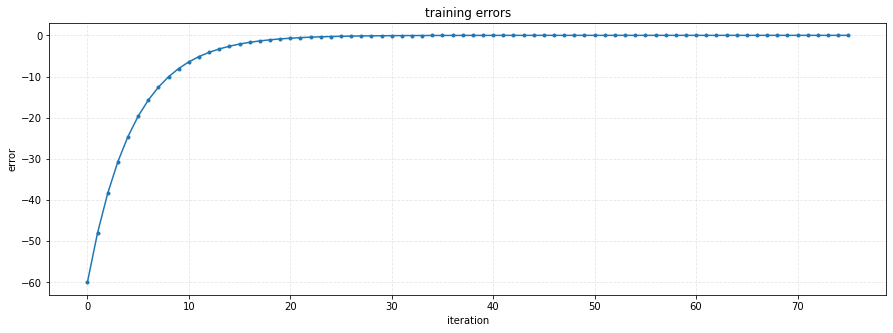

In [128]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [129]:
y_hat = np.matmul(X, result.T)

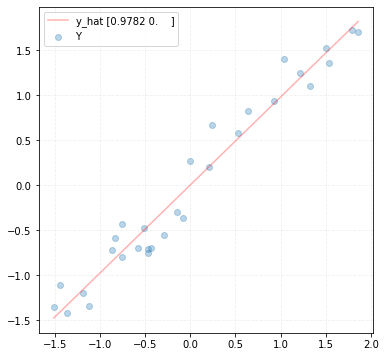

In [130]:
fg, ax = plt.subplots(1,1)
# ax.scatter(df_model_std['House area sq ft'], y_hat, color='blue', alpha=0.3, label='$\hat{y}$')
ax.scatter(df2_std['YearsExperience'], Y, alpha=0.3, label='Y')
ax.plot(df2_std['YearsExperience'], y_hat, color='red', alpha=0.3, label=f'y_hat {np.round(result,4)}')
ax.grid(linestyle='--', alpha=0.2)
ax.legend()
fg.set_size_inches(6, 6)

BREAKING: theta is = [9.86419828e-01 1.05915019e-06]
0.12566820371879367 0.6777019033721661 0.16424357555873023


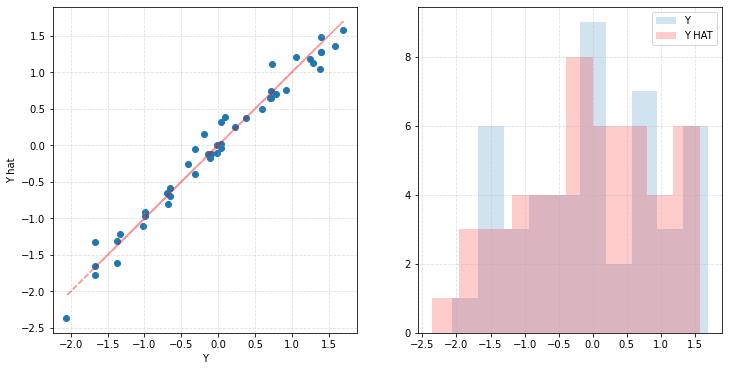

In [131]:

X = df_model_std[['House area sq ft', 'c']].values
Y = df_model_std['Price'].values
# print(X, Y)

lrmle = LinearRegMLE()
result, df_iter = lrmle.estimate(Y, X, learning_rate=0.01, quiet=True)
y_hat = lrmle.pred(X, result)

print(lrmle.mae(Y, y_hat), lrmle.mape(Y, y_hat), lrmle.rmse(Y, y_hat))
lrmle.plot_result(Y, y_hat)

In [132]:
Y_raw = df_model['Price']
Y_raw_mean = np.mean(df_model['Price'])
Y_raw_std = np.std(df_model['Price'])
y_hat_adj = y_hat*Y_raw_std + Y_raw_mean

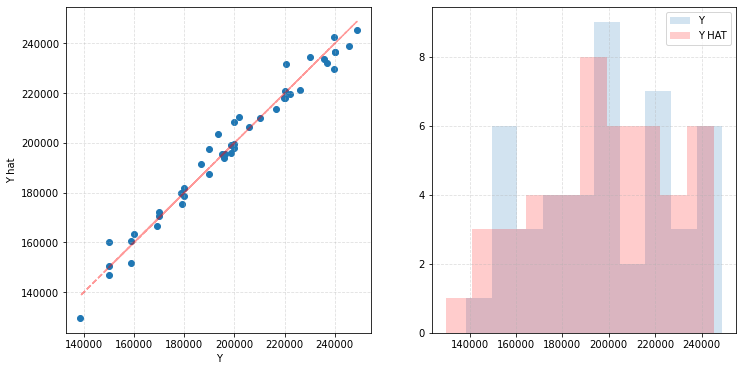

In [133]:
lrmle.plot_result(Y_raw, y_hat_adj)

In [134]:
df_temp = pd.DataFrame(
    {
        'Y': Y_raw,
        'y_hat': y_hat_adj
    }
)

In [138]:
import sklearn.metrics as sm
sm.mean_absolute_percentage_error(Y_raw, y_hat_adj)

0.01909044196291587

In [139]:
df_temp['diff'] = df_temp['Y'] - df_temp['y_hat']
df_temp['abs_diff'] = np.abs(df_temp['diff'])
df_temp['pe_abs_diff'] = df_temp['abs_diff']*1.0/df_temp['Y']
print(f"MAE {np.round(np.mean(df_temp['abs_diff']),2):,}, MAPE={np.round(np.mean(df_temp['pe_abs_diff']),4):.2%}") 
# df_temp.head(1000)

MAE 3,688.62, MAPE=1.91%


In [140]:
# from sklearn.metrics import mean_absolute_percentage_error

In [141]:
# mean_absolute_percentage_error(Y, y_hat)

In [203]:
class LinearRegMLE():
    def __init__(self):
        self.learning_rate = 0.1
        self.iters = 2000
    
    def pred(self, X, theta):
        return np.matmul(X, theta.T)
    
    def estimate(self, Y, X, learning_rate=None, iters=None, quiet=True, reg=None, thresh=0.000001):
        learning_rate = learning_rate or self.learning_rate
        iters = iters or self.iters
#         print(learning_rate, iters)
        theta = np.ones(len(X[0]))
        delta_t = np.zeros(len(X[0]))
        n = len(Y)
        
        err_prev = -np.inf
        
        result = None
        iter_rows = []
        break_flag = False
        for it in range(iters):
            if break_flag:
                break
            err = Y - np.matmul(X, theta.T)
            if reg == 'sumto1':
                err += 1 - np.sum(theta)

            delta_t =  -2/n * np.matmul(X.T, err)

            theta = theta - learning_rate* delta_t.T
            if not quiet and it >= 500 and it % 500 == 0:
#                 print(it, np.round(np.sum(err), 4), theta, delta_t, X.shape, delta_t.shape)
                print(it, np.round(np.sum(err), 4), X.shape, delta_t.shape)

            iter_row = {
                'ix': it,
                'err': np.round(np.sum(err), 4),
                't_temp': theta,
                'delta_t': delta_t

            }
            iter_rows.append(iter_row)
            if np.abs(err_prev - np.sum(err)) < thresh:
                result = theta
                print('BREAKING: theta is =', theta)
                break_flag = True
            err_prev = np.sum(err)
            self.df_iter = pd.DataFrame(iter_rows)    
        result = theta
        return result, self.df_iter
    def split(X, Y, split=0.8):
        split_flag = np.array([ True for _ in range(len(Y)) if np.random.rand() < split else False])
        X_test = np.array([for y,v in zip(Y, split_flag)])
    def standardize(self, df):
        df_tmp = df.copy()
        for c in df_tmp.columns:

            mu, sig = np.mean(df_tmp[c]), np.std(df_tmp[c])
            if sig == 0:
                continue
            #         print(c, mu, sig)
            df_tmp[c] = (df_tmp[c] - mu) / sig        
        return df_tmp
    def mae(self, y, y_hat):
        return np.mean(np.abs(y - y_hat))
    
    def mape(self, y, y_hat):
        return np.mean(np.abs(y_hat/y-1))
    def rmse(self, y, y_hat):
        return np.sqrt(np.mean(np.power(y-y_hat,2)))

    def plot_result(self, Y, y_hat):
        fg, ax = plt.subplots(1,2)
        ax[0].scatter(Y, y_hat)
        ax[0].plot(Y, Y, label='Y-Y', color='red', linestyle='--', alpha=0.4)

        ax[0].set_xlabel('Y')
        ax[0].set_ylabel('Y hat')
        ax[0].grid(linestyle='--', alpha=0.4)
        ax[1].hist(Y,  alpha=0.2, label='Y')
        ax[1].hist(y_hat, color='red', alpha=0.2, label='Y HAT')
        ax[1].legend()
        ax[1].grid(linestyle='--', alpha=0.4)
        fg.set_size_inches(6*2,6)

## No Reg

In [352]:
lrmle = LinearRegMLE()


In [353]:
!ls

50_Startups.csv                     MLE_notebook.ipynb
Date-Wise-Prices-all-Commodity.xlsx Salary_Data.csv
MLE.htm                             Student_Performance.csv
MLE_files                           Untitled.ipynb


In [354]:
df50 = pd.read_csv('50_Startups.csv')

In [355]:
df50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [356]:
df50['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [357]:
df50['is_NY'] = (df50['State'] == 'New York')*1
df50['is_CA'] = (df50['State'] == 'California')*1

In [358]:
df50.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,is_NY,is_CA
0,165349.20,136897.80,471784.10,New York,192261.83,1,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,1,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0


In [359]:
df50_model = df50[['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA', 'Profit']].copy()

In [360]:
df50_model['c'] = 1
df50_model.head()

,R&D Spend,Administration,Marketing Spend,is_NY,is_CA,Profit,c
0,165349.20,136897.80,471784.10,1,0,192261.83,1
1,162597.70,151377.59,443898.53,0,1,191792.06,1
2,153441.51,101145.55,407934.54,0,0,191050.39,1
3,144372.41,118671.85,383199.62,1,0,182901.99,1
4,142107.34,91391.77,366168.42,0,0,166187.94,1


In [361]:
df50_model_std = lrmle.standardize(df50_model)

In [362]:
df50_model_std.head()

,R&D Spend,Administration,Marketing Spend,is_NY,is_CA,Profit,c
0,2.016411,0.560753,2.153943,1.393261,-0.717741,2.011203,1
1,1.955860,1.082807,1.923600,-0.717741,1.393261,1.999430,1
2,1.754364,-0.728257,1.626528,-0.717741,-0.717741,1.980842,1
3,1.554784,-0.096365,1.422210,1.393261,-0.717741,1.776627,1
4,1.504937,-1.079919,1.281528,-0.717741,-0.717741,1.357740,1


In [363]:
df50_model_std.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit', 'c'],
      dtype='object')

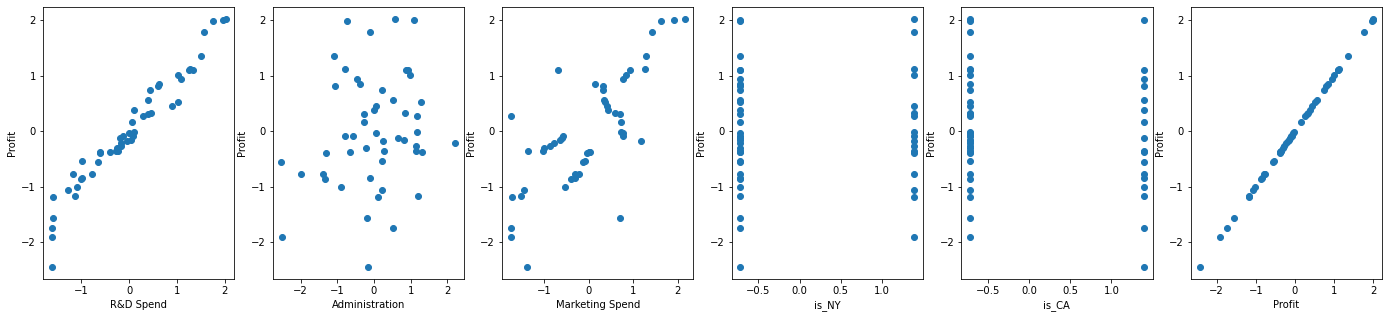

In [364]:
df_plot = df50_model_std
cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit']

fg, ax = plt.subplots(1, len(cols))
for a, c in zip(ax, cols):
    a.scatter(df_plot[c], df_plot['Profit'])
    a.set_xlabel(c)
    a.set_ylabel('Profit')

fg.set_size_inches(4*len(cols), 5)

In [365]:
df50_model_std['c'] = 1

In [366]:
df50_model_std.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA',
       'Profit', 'c'],
      dtype='object')

In [367]:

X = df50_model_std[['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA','c']].values
Y = df50_model_std['Profit'].values

X_raw = df50_model[['R&D Spend', 'Administration', 'Marketing Spend', 'is_NY', 'is_CA','c']].values
Y_raw = df50_model['Profit'].values
# print(X, Y)


# Y = df_plot['Profit']
# X = df_plot['Profit']


In [368]:
len(X[0])

6

In [369]:
result, df_iter = lrmle.estimate(Y, X, learning_rate=0.01)

BREAKING: theta is = [ 8.82315637e-01 -6.26015635e-03  1.17303421e-01  5.68998479e-03
  5.08965790e-03  9.57387879e-07]


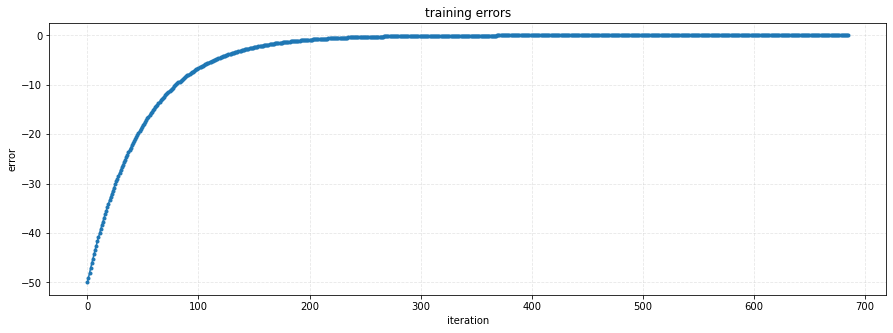

In [370]:
fg, ax = plt.subplots(1,1)
ax.plot(df_iter['ix'], df_iter['err'], marker='.')

_ = ax.grid(linestyle='--', alpha=0.3)
_ = ax.set_xlabel('iteration')
_ = ax.set_ylabel('error')
ax.set_title('training errors')
fg.set_size_inches(15, 5)


In [371]:
result.T

array([ 8.82315637e-01, -6.26015635e-03,  1.17303421e-01,  5.68998479e-03,
        5.08965790e-03,  9.57387879e-07])

In [372]:
y_hat = np.matmul(X, result.T)

In [373]:
lrmle.mae(Y, y_hat), lrmle.mape(Y, y_hat), lrmle.rmse(Y, y_hat)

(0.16176394005424682, 0.5832926844970374, 0.22329332762564505)

In [374]:
Y_raw = df50_model['Profit']
Y_raw_mean = np.mean(Y_raw)
Y_raw_std = np.std(Y_raw)
y_hat_adj = y_hat*Y_raw_std + Y_raw_mean

In [375]:
df_result = pd.DataFrame(
    {
        'Y':Y_raw,
        'y_hat':y_hat_adj
    }
)

In [376]:
df_result['ape']=np.abs(df_result['y_hat']/df_result['Y']-1)
df_result['ae']=np.abs(df_result['y_hat']-df_result['Y'])

In [377]:
sm.mean_absolute_percentage_error(Y_raw, y_hat_adj)

0.10640421420376914

In [378]:
# df_temp['diff'] = df_temp['Y'] - df_temp['y_hat']
# df_temp['abs_diff'] = np.abs(df_temp['diff'])
# df_temp['pe_abs_diff'] = df_temp['abs_diff']*1.0/df_temp['Y']
# print(f"MAE {np.round(np.mean(df_temp['abs_diff']),2):,}, MAPE={np.round(np.mean(df_temp['pe_abs_diff']),4):.2%}") 
# # df_temp.head(1000)

In [379]:
df_result.head(40).round(4)

,Y,y_hat,ape,ae
0,192261.83,193113.2428,0.0044,851.4128
1,191792.06,189722.4229,0.0108,2069.6371
2,191050.39,181261.8778,0.0512,9788.5122
3,182901.99,173600.7140,0.0509,9301.2760
4,166187.94,170953.7864,0.0287,4765.8464
5,156991.12,163303.3129,0.0402,6312.1929
6,156122.51,155856.4303,0.0017,266.0797
7,155752.60,159681.9362,0.0252,3929.3362
8,152211.77,152100.1997,0.0007,111.5703
9,149759.96,154317.2078,0.0304,4557.2478


In [380]:
np.mean(df_result['ape'])

0.10640421420376914

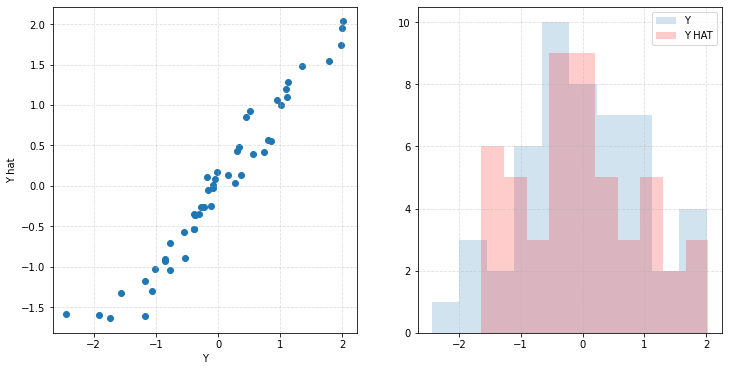

In [381]:
fg, ax = plt.subplots(1,2)
ax[0].scatter(Y, y_hat)

ax[0].set_xlabel('Y')
ax[0].set_ylabel('Y hat')
ax[0].grid(linestyle='--', alpha=0.4)
ax[1].hist(Y,  alpha=0.2, label='Y')
ax[1].hist(y_hat, color='red', alpha=0.2, label='Y HAT')
ax[1].legend()
ax[1].grid(linestyle='--', alpha=0.4)
fg.set_size_inches(6*2,6)

In [382]:
# class LinearRegressionMLE():
#     def __init__(self,x_train,y_train):
#         self.x_train=x_train
#         self.y_train=y_train
#         self.parameters = None

#     def train(self):
#         n= y_train.shape[0]
#         X= self.x_train
#         # MLE weights equation
#         inverse = np.linalg.inv(X.T @ X)
#         weights = (inverse @ X.T).dot(self.y_train)

#         # MLE bias equation
#         bias = 1/n*np.sum(self.y_train- np.dot(X,weights))

#         self.parameters = np.vstack((weights,bias))
#         return self.parameters

#     def predict(self,x_test):
#         weights = self.parameters[0:-1,:]
#         bias = self.parameters[-1,:]
#         return np.dot(x_test,weights) + bias[0]     

# class LinearRegressionMLE_with_reg():
#     def __init__(self,x_train,y_train):
#         self.x_train=x_train
#         self.y_train=y_train
#         self.parameters = None

#     def train(self):
#         n= y_train.shape[0]
#         X= self.x_train
#         # MLE weights equation
#         inverse = np.linalg.inv(X.T @ X)
#         weights = (inverse @ X.T).dot(self.y_train)

#         # MLE bias equation
#         bias = 1/n*np.sum(self.y_train - np.dot(X,weights))

#         self.parameters = np.vstack((weights,bias))
#         return self.parameters

#     def predict(self,x_test):
#         weights = self.parameters[0:-1,:]
#         bias = self.parameters[-1,:]
#         return np.dot(x_test,weights) + bias[0]     


In [383]:
# model =LinearRegMLE(X_train,y_train)
# parameters = model.train()
# weights = parameters[0:-1,:]
# bias = parameters[-1,:]
# prediction =  model.predict(X_test)
# fg, ax = plt.subplots(1,1)
# ax.set_title('House area vs Price')
# ax.set_xlabel('House area(ft^2)')
# ax.set_label('Price($)')
# linear_equation = "y={:0.2f}x+{:0.2f}".format(weights[0][0],bias[0])
# ax.plot(X_test,prediction,color='k',label=linear_equation)
# ax.scatter(X_test,y_test,label='Correct output')
# _ = ax.legend()
# _ = ax.grid(linestyle='--', alpha=0.3)
# # plt.show()

## Reg

In [384]:
lrmle = LinearRegMLE()

result, df_iter = lrmle.estimate(Y, X, learning_rate=0.001, reg='sumto1', quiet=False, 
                                 iters=15000, thresh=0.000001)

500 -3.4404 (50, 6) (6,)
1000 15.071 (50, 6) (6,)
1500 10.3281 (50, 6) (6,)
2000 6.3894 (50, 6) (6,)
2500 4.0535 (50, 6) (6,)
3000 2.6564 (50, 6) (6,)
3500 1.7874 (50, 6) (6,)
4000 1.2294 (50, 6) (6,)
4500 0.8622 (50, 6) (6,)
5000 0.6157 (50, 6) (6,)
5500 0.4471 (50, 6) (6,)
6000 0.3298 (50, 6) (6,)
6500 0.2467 (50, 6) (6,)
7000 0.1869 (50, 6) (6,)
7500 0.1432 (50, 6) (6,)
8000 0.1107 (50, 6) (6,)
8500 0.0863 (50, 6) (6,)
9000 0.0676 (50, 6) (6,)
9500 0.0533 (50, 6) (6,)
10000 0.0422 (50, 6) (6,)
10500 0.0335 (50, 6) (6,)
11000 0.0267 (50, 6) (6,)
11500 0.0213 (50, 6) (6,)
12000 0.0171 (50, 6) (6,)
12500 0.0137 (50, 6) (6,)
13000 0.0109 (50, 6) (6,)
13500 0.0088 (50, 6) (6,)
14000 0.007 (50, 6) (6,)
14500 0.0057 (50, 6) (6,)


In [385]:
result

array([ 0.91688352, -0.018403  ,  0.08288982, -0.00264564, -0.00218203,
        0.0116832 ])

In [386]:
np.sum(result)

0.9882258597571548

In [387]:
import sklearn.model_selection as sk_ms





In [388]:
Y_mean, Y_sigma = np.mean(Y_raw), np.std(Y_raw)
X_train, X_test, Y_train, Y_test = sk_ms.train_test_split(X, Y, test_size=0.33)

In [402]:
lrmle = LinearRegMLE()

result, df_iter = lrmle.estimate(Y_train, X_train, learning_rate=0.001, reg='sumto1', 
                                 quiet=False, iters=30000, thresh=0.00001)



500 -8.7412 (33, 6) (6,)
1000 11.7421 (33, 6) (6,)
1500 8.8962 (33, 6) (6,)
2000 5.5144 (33, 6) (6,)
2500 3.5279 (33, 6) (6,)
3000 2.3941 (33, 6) (6,)
3500 1.7002 (33, 6) (6,)
4000 1.2475 (33, 6) (6,)
4500 0.9392 (33, 6) (6,)
5000 0.7229 (33, 6) (6,)
5500 0.5672 (33, 6) (6,)
6000 0.4524 (33, 6) (6,)
6500 0.3659 (33, 6) (6,)
7000 0.2993 (33, 6) (6,)
7500 0.247 (33, 6) (6,)
8000 0.2053 (33, 6) (6,)
8500 0.1716 (33, 6) (6,)
9000 0.1441 (33, 6) (6,)
9500 0.1213 (33, 6) (6,)
10000 0.1024 (33, 6) (6,)
10500 0.0866 (33, 6) (6,)
11000 0.0733 (33, 6) (6,)
11500 0.0621 (33, 6) (6,)
12000 0.0527 (33, 6) (6,)
12500 0.0447 (33, 6) (6,)
13000 0.0379 (33, 6) (6,)
13500 0.0322 (33, 6) (6,)
BREAKING: theta is = [ 0.86300587  0.0093402   0.1012297  -0.00964231  0.00460452  0.02359785]


In [437]:
np.sum([ 0.86300587, 0.0093402,   0.1012297,  -0.00964231,  0.00460452,  0.02359785])

0.9921358299999999

In [403]:
Y_test_yhat = np.matmul(X_test, result.T)
Y_train_yhat = np.matmul(X_train, result.T)

In [404]:
Y_raw

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [405]:
Y_mean, Y_sigma

(112012.63920000002, 39901.08281667283)

In [406]:
Y_test_raw = Y_test * Y_sigma + Y_mean
Y_test_yhat_raw = Y_test_yhat * Y_sigma + Y_mean

Y_train_raw = Y_train * Y_sigma + Y_mean
Y_train_yhat_raw = Y_train_yhat * Y_sigma + Y_mean


print(f'test mape {np.mean(np.abs(Y_test_yhat_raw/Y_test_raw - 1)):.2%}')
print(f'train mape {np.mean(np.abs(Y_train_yhat_raw/Y_train_raw - 1)):.2%}')


test mape 20.06%
train mape 6.82%


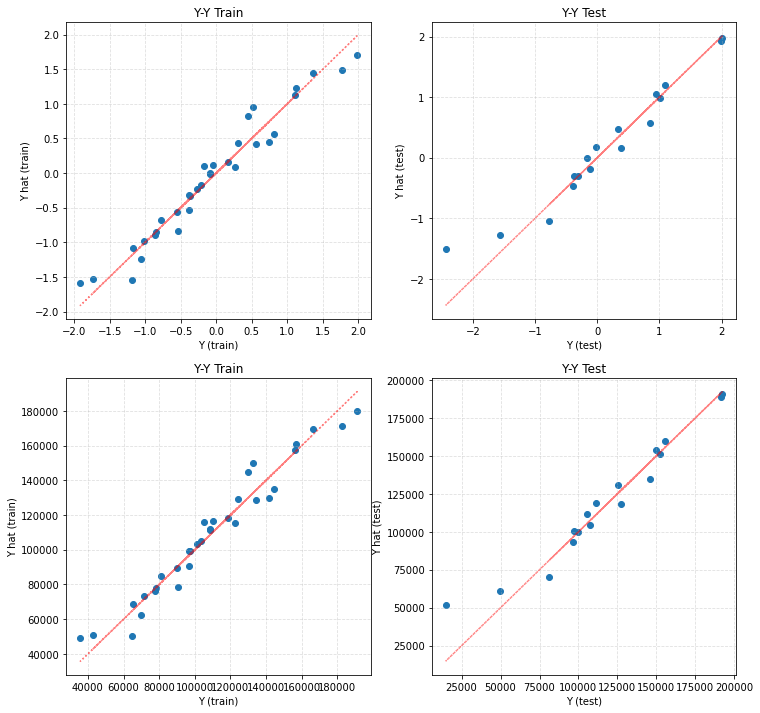

In [407]:
fg, ax = plt.subplots(2,2)
_ = ax[0][0].scatter(Y_train, Y_train_yhat)
_ = ax[0][0].plot(Y_train, Y_train, alpha=0.5, color='red', linestyle=':')
_ = ax[0][0].set_title('Y-Y Train')
_ = ax[0][0].set_ylabel('Y hat (train)')
_ = ax[0][0].set_xlabel('Y (train)')

_ = ax[0][1].scatter(Y_test, Y_test_yhat)
_ = ax[0][1].plot(Y_test, Y_test, alpha=0.5, color='red', linestyle=':')
_ = ax[0][1].set_title('Y-Y Test')
_ = ax[0][1].set_ylabel('Y hat (test)')
_ = ax[0][1].set_xlabel('Y (test)')


_ = ax[1][0].scatter(Y_train_raw, Y_train_yhat_raw)
_ = ax[1][0].plot(Y_train_raw, Y_train_raw, alpha=0.5, color='red', linestyle=':')
_ = ax[1][0].set_title('Y-Y Train')
_ = ax[1][0].set_ylabel('Y hat (train)')
_ = ax[1][0].set_xlabel('Y (train)')

_ = ax[1][1].scatter(Y_test_raw, Y_test_yhat_raw)
_ = ax[1][1].plot(Y_test_raw, Y_test_raw, alpha=0.5, color='red', linestyle=':')
_ = ax[1][1].set_title('Y-Y Test')
_ = ax[1][1].set_ylabel('Y hat (test)')
_ = ax[1][1].set_xlabel('Y (test)')


for ar in ax:
    for a in ar:
        _ = a.grid(linestyle='--', alpha=0.4)
#         _ = a.set_xlim(-3,3)
#         _ = a.set_ylim(-3,3)

_ = fg.set_size_inches(6*2, 6* 2)


In [408]:
df_test = pd.DataFrame({
    'Y Test':Y_test_raw, 
    'Y Test yhat':Y_test_yhat_raw
})
df_test['diff'] = df_test['Y Test yhat'] - df_test['Y Test']
df_test['diff_pct'] = df_test['diff']*100.0/df_test['Y Test']
df_test['diff_pct_abs'] = np.abs(df_test['diff_pct'])

In [409]:
df_test

,Y Test,Y Test yhat,diff,diff_pct,diff_pct_abs
0,111313.02,119219.178935,7906.158935,7.102636,7.102636
1,146121.95,134922.472564,-11199.477436,-7.664473,7.664473
2,96712.80,93282.756437,-3430.043563,-3.546628,3.546628
3,49490.75,61027.583033,11536.833033,23.311090,23.311090
4,14681.40,52028.312650,37346.912650,254.382502,254.382502
5,99937.59,100134.877576,197.287576,0.197411,0.197411
6,155752.60,160062.092231,4309.492231,2.766883,2.766883
7,97427.84,100274.032516,2846.192516,2.921334,2.921334
8,81229.06,70146.529721,-11082.530279,-13.643554,13.643554
9,191792.06,189009.435649,-2782.624351,-1.450855,1.450855


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [414]:
df_test.describe(percentiles=np.linspace(0,1,21))

,Y Test,Y Test yhat,diff,diff_pct,diff_pct_abs
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,117893.753529,120125.802989,2232.049460,15.695958,20.056935
std,45908.023148,40494.048225,11102.989171,62.002092,60.651439
min,14681.400000,52028.312650,-11199.477436,-13.643554,0.197411
0%,14681.400000,52028.312650,-11199.477436,-13.643554,0.197411
5%,42528.880000,59227.728957,-11105.919711,-8.860289,0.418388
10%,68533.736000,66498.951046,-9516.262165,-7.068571,0.698608
15%,87422.556000,79401.020407,-6455.267478,-5.421433,1.089497
20%,96855.808000,94653.180665,-3338.898694,-3.391157,1.714060
25%,97427.840000,100134.877576,-2974.319217,-2.769273,2.766883


69.52537201300896

In [421]:
df_test[(df_test['diff_pct_abs'] > np.percentile(df_test['diff_pct_abs'], 5) )&(df_test['diff_pct_abs'] < np.percentile(df_test['diff_pct_abs'], 95))].describe()

,Y Test,Y Test yhat,diff,diff_pct,diff_pct_abs
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,125971.654667,125998.364039,26.709373,0.816758,5.759199
std,39430.539649,38435.546398,6877.889783,8.348743,5.905819
min,49490.750000,61027.583033,-11199.477436,-13.643554,0.473632
25%,101580.690000,102352.026649,-3202.181390,-3.157951,2.768078
50%,125370.370000,119219.178935,-720.924392,-0.473632,3.546628
75%,150985.865000,152769.243290,4898.191368,3.648939,6.886970
max,192261.830000,190630.311482,11536.833033,23.311090,23.311090


## Student with Reg

In [425]:
dfstud = pd.read_csv("Student_Performance.csv")
dfstud.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [426]:
dfstud['EA'] = (dfstud['Extracurricular Activities'] == 'Yes')*1

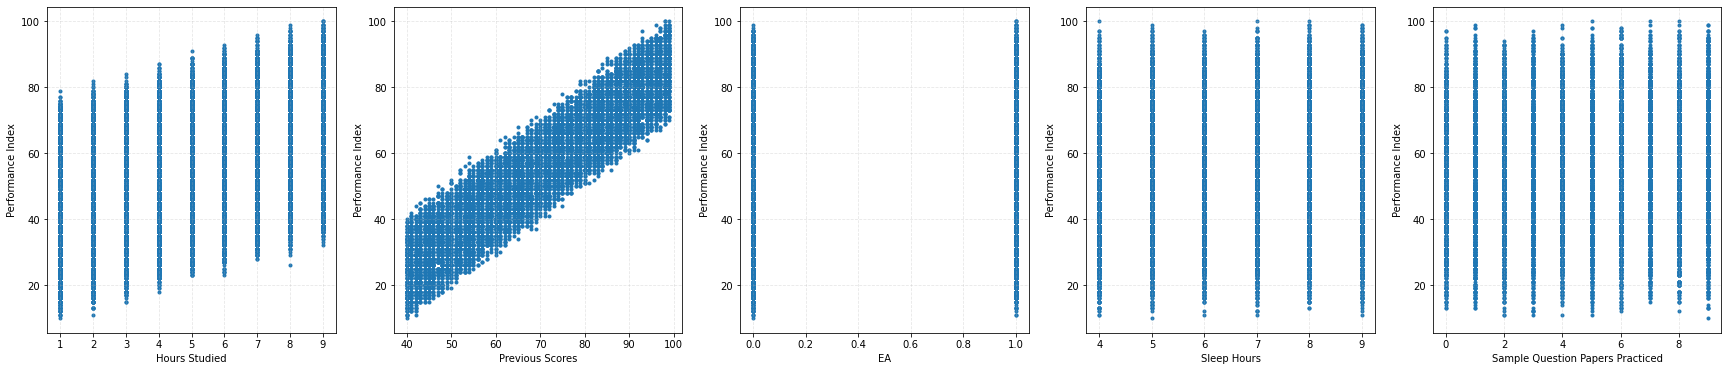

In [427]:
features = ['Hours Studied', 'Previous Scores', 'EA', 'Sleep Hours', 'Sample Question Papers Practiced']
target = 'Performance Index'


dfstud.head()
def scatters(df, features, target):
    fg, ax = plt.subplots(1, len(features))
    for a, f in zip(ax, features):
        a.scatter(df[f], df[target], marker='.', label=f)
        a.grid(linestyle='--', alpha=0.3)
        a.set_xlabel(f)
        a.set_ylabel(target)
    fg.set_size_inches(6*len(features), 6)
scatters(dfstud, features, target)

In [428]:
lr_mle_reg = LinearRegMLE()

In [429]:
cols = features.copy()
cols.append(target)
dfstud_model = dfstud[cols]
dfstud_model_std =  lr_mle_reg.standardize(dfstud_model)
dfstud_model_std.head()

,Hours Studied,Previous Scores,EA,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870


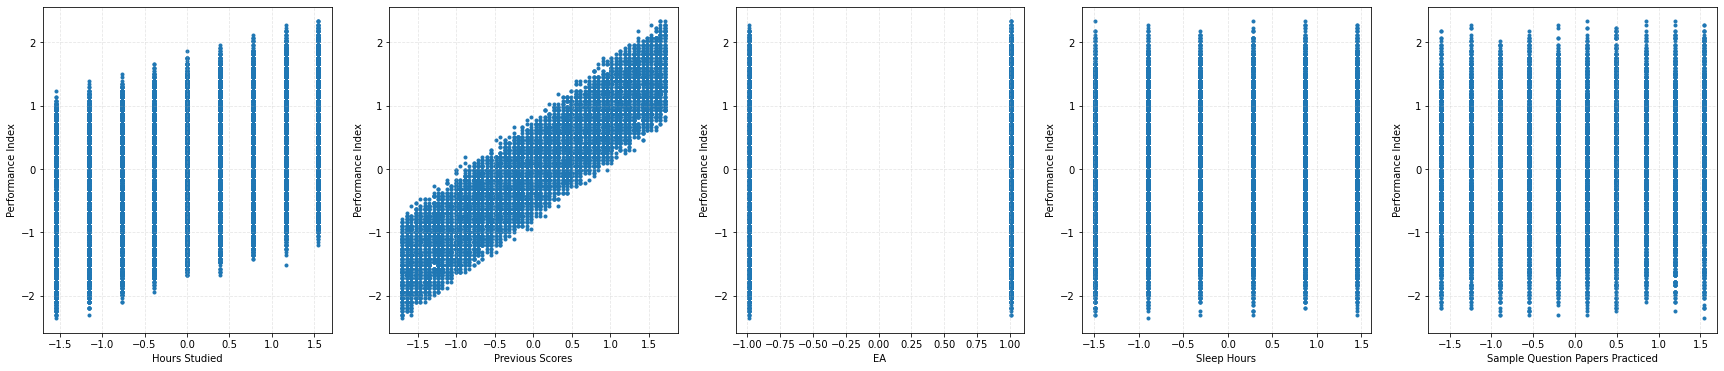

In [430]:
scatters(dfstud_model_std, features, target)

In [431]:
Y_raw = dfstud_model[target]
X_raw = dfstud_model[features]

X_train, X_test, Y_train, Y_test = sk_ms.train_test_split(dfstud_model_std[features].values, 
                                               dfstud_model_std[target].values, test_size=0.33)




In [335]:
lrmle = LinearRegMLE()

result, df_iter = lrmle.estimate(Y_train, X_train, learning_rate=0.001, reg=None, 
                                 quiet=False, iters=30000, thresh=0.000001)


500 43.2874 (6700, 5) (5,)
1000 17.6471 (6700, 5) (5,)
1500 8.1995 (6700, 5) (5,)
2000 4.7155 (6700, 5) (5,)
2500 3.4297 (6700, 5) (5,)
3000 2.9548 (6700, 5) (5,)
3500 2.7793 (6700, 5) (5,)
4000 2.7144 (6700, 5) (5,)
4500 2.6903 (6700, 5) (5,)
5000 2.6814 (6700, 5) (5,)
5500 2.6781 (6700, 5) (5,)
6000 2.6769 (6700, 5) (5,)
BREAKING: theta is = [0.38424276 0.91843145 0.01470604 0.04174854 0.02917564]


In [336]:
np.sum(result)

1.3883044372840123

In [435]:
def yy(X_raw, X, X_train, X_test, Y_raw, Y, Y_train, Y_test, theta):
    Y_mean, Y_sigma = np.mean(Y_raw), np.std(Y_raw)
    
    Y_test_yhat = np.matmul(X_test, theta.T)
    Y_train_yhat = np.matmul(X_train, theta.T)
    
    Y_train_raw = Y_train * Y_sigma + Y_mean
    Y_train_yhat_raw = Y_train_yhat * Y_sigma + Y_mean
    Y_test_raw = Y_test * Y_sigma + Y_mean
    Y_test_yhat_raw = Y_test_yhat * Y_sigma + Y_mean

    
    print(f'test mape {np.mean(np.abs(Y_test_yhat_raw/Y_test_raw - 1)):.2%}')
    print(f'train mape {np.mean(np.abs(Y_train_yhat_raw/Y_train_raw - 1)):.2%}')

    fg, ax = plt.subplots(2,2)
    _ = ax[0][0].scatter(Y_train, Y_train_yhat, marker='.')
    _ = ax[0][0].plot(Y_train, Y_train, alpha=0.5, color='red', linestyle=':')
    _ = ax[0][0].set_title('Y-Y Train')
    _ = ax[0][0].set_ylabel('Y hat (train)')
    _ = ax[0][0].set_xlabel('Y (train)')

    _ = ax[0][1].scatter(Y_test, Y_test_yhat, marker='.')
    _ = ax[0][1].plot(Y_test, Y_test, alpha=0.5, color='red', linestyle=':')
    _ = ax[0][1].set_title('Y-Y Test')
    _ = ax[0][1].set_ylabel('Y hat (test)')
    _ = ax[0][1].set_xlabel('Y (test)')


    _ = ax[1][0].scatter(Y_train_raw, Y_train_yhat_raw, marker='.')
    _ = ax[1][0].plot(Y_train_raw, Y_train_raw, alpha=0.5, color='red', linestyle=':')
    _ = ax[1][0].set_title('Y-Y Train')
    _ = ax[1][0].set_ylabel('Y hat (train)')
    _ = ax[1][0].set_xlabel('Y (train)')

    _ = ax[1][1].scatter(Y_test_raw, Y_test_yhat_raw, marker='.')
    _ = ax[1][1].plot(Y_test_raw, Y_test_raw, alpha=0.5, color='red', linestyle=':')
    _ = ax[1][1].set_title('Y-Y Test')
    _ = ax[1][1].set_ylabel('Y hat (test)')
    _ = ax[1][1].set_xlabel('Y (test)')


    for ar in ax:
        for a in ar:
            _ = a.grid(linestyle='--', alpha=0.4)
    #         _ = a.set_xlim(-3,3)
    #         _ = a.set_ylim(-3,3)

    _ = fg.set_size_inches(6*2, 6* 2)
    
    df_test = pd.DataFrame({
    'Y Test':Y_test_raw, 
    'Y Test yhat':Y_test_yhat_raw
    })
    df_test['diff'] = df_test['Y Test yhat'] - df_test['Y Test']
    df_test['diff_pct'] = df_test['diff']*100.0/df_test['Y Test']
    df_test['diff_pct_abs'] = np.abs(df_test['diff_pct'])
    return df_test


test mape 3.47%
train mape 3.45%


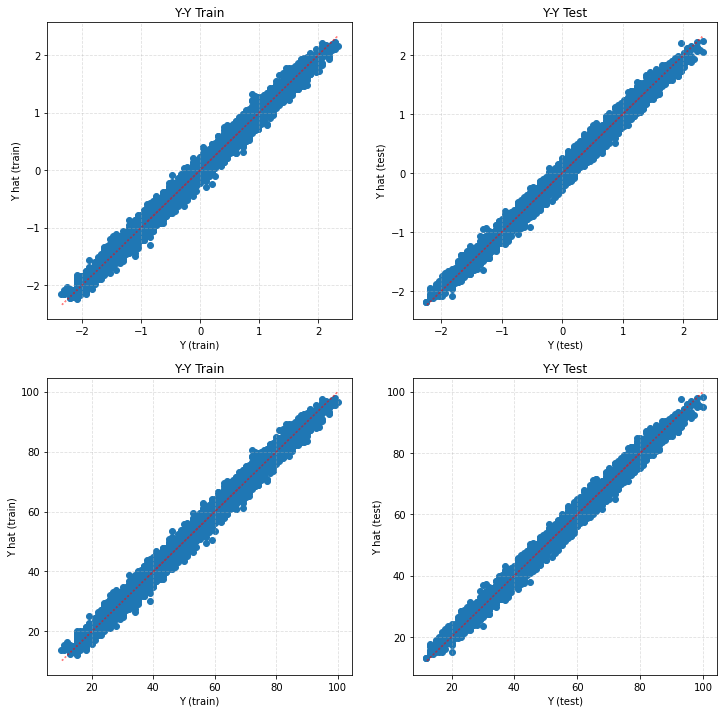

In [351]:
pd.set_option('display.max_rows', 500000)

df_test = yy(X_raw, X, X_train, X_test, Y_raw, Y, Y_train, Y_test, result)

In [347]:
df_test.head()

,Y Test,Y Test yhat,diff,diff_pct,diff_pct_abs
0,46.0,46.018062,0.018062,0.039266,0.039266
1,70.0,70.545068,0.545068,0.778669,0.778669
2,25.0,26.882023,1.882023,7.528093,7.528093
3,35.0,38.391196,3.391196,9.689130,9.689130
4,60.0,62.400491,2.400491,4.000819,4.000819


In [349]:
df_test['diff_pct_abs'].mean()

3.470568620539881

In [438]:
lrmle = LinearRegMLE()

result, df_iter = lrmle.estimate(Y_train, X_train, learning_rate=0.001, reg='sumto1', 
                                 quiet=False, iters=30000, thresh=0.0001)


500 -11349.7755 (6700, 5) (5,)
1000 -5784.7848 (6700, 5) (5,)
1500 -3773.3709 (6700, 5) (5,)
2000 -3046.1151 (6700, 5) (5,)
2500 -2783.0715 (6700, 5) (5,)
3000 -2687.8951 (6700, 5) (5,)
3500 -2653.4443 (6700, 5) (5,)
4000 -2640.9693 (6700, 5) (5,)
4500 -2636.45 (6700, 5) (5,)
5000 -2634.8121 (6700, 5) (5,)
5500 -2634.2183 (6700, 5) (5,)
6000 -2634.0028 (6700, 5) (5,)
BREAKING: theta is = [0.38294987 0.92026913 0.01722814 0.04411701 0.02950398]


test mape 3.46%
train mape 3.46%


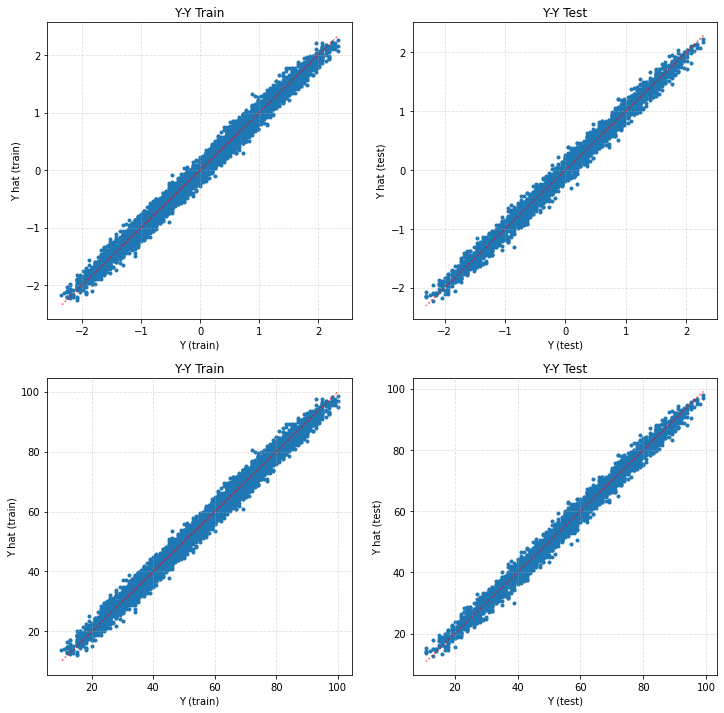

In [439]:
df_test = yy(X_raw, X, X_train, X_test, Y_raw, Y, Y_train, Y_test, result)

In [440]:
result.sum()

1.394068136444459